# sklearn

In [67]:
# Импорты
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os
import numpy as np 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.svm import SVC
import cv2
from skimage.filters import threshold_otsu

import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color
from skimage import io



In [18]:
# Пути к датасету

# Получение пути к текущей папке
current_dir = os.getcwd()

# Пути к папкам датасета
dataset_folder = "dataset"
image_folder = "image"
mask_folder = "mask"

# Объединение путей с помощью os.path.join()
image_folder = os.path.join(current_dir, dataset_folder, image_folder)
mask_folder = os.path.join(current_dir, dataset_folder, mask_folder)

print("Полный путь к папке с изображениями:", image_folder)
print("Полный путь к папке с масками:", mask_folder)
# Тестовое изображение
test = os.path.join(current_dir, dataset_folder, image_folder, "1.jpg")

Полный путь к папке с изображениями: C:\Users\drug1\ANACONDA\PYTORCH\methods_segmentation\dataset\image
Полный путь к папке с масками: C:\Users\drug1\ANACONDA\PYTORCH\methods_segmentation\dataset\mask


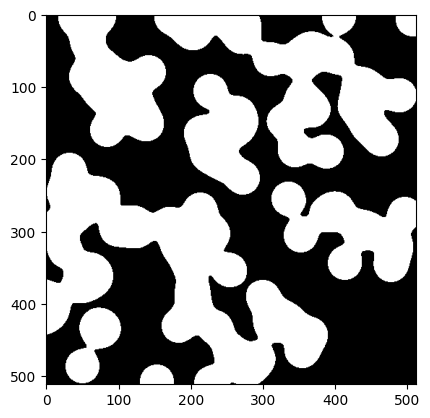

In [5]:
image = data.binary_blobs()
plt.imshow(image, cmap='gray')

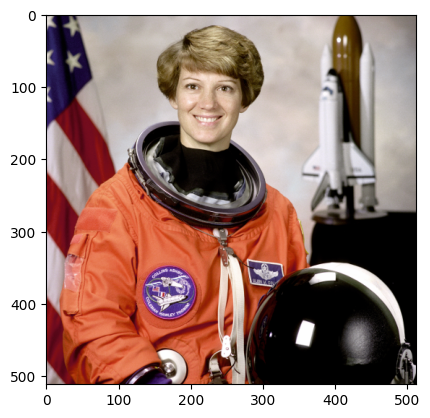

In [10]:
image = data.astronaut()
plt.imshow(image)

In [185]:
# Функция вывода изображений
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 8))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
 
    return fig, ax

In [186]:
# Функция для вывода 4 изображений
def show_four_images(image1, image2, image3, image4, text2='Пороговая сегментация', text3='treshold OTSU', text4='Локальный порог', text1='Оригинал'):
    # Создание подграфиков
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    axes[0, 0].imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
    axes[0, 0].set_title(text1)
    axes[0, 0].axis('off')
    
    axes[0, 1].imshow(image2, cmap='gray')
    axes[0, 1].set_title(text2)
    axes[0, 1].axis('off')
    
    axes[1, 0].imshow(image3, cmap='gray')
    axes[1, 0].set_title(text3)
    axes[1, 0].axis('off')
    
    axes[1, 1].imshow(image4, cmap='gray')
    axes[1, 1].set_title(text4)
    axes[1, 1].axis('off')

    # Показать график с изображениями
    plt.tight_layout()
    plt.show()

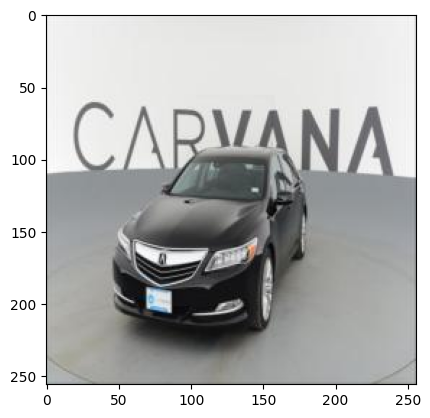

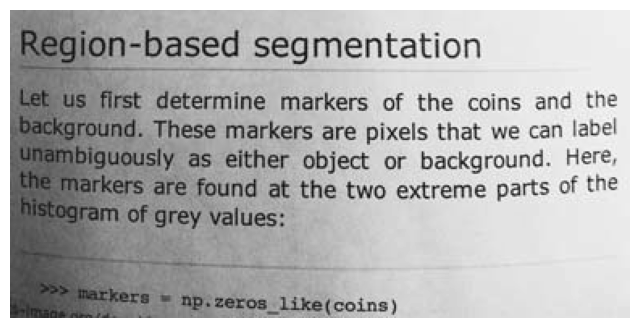

In [189]:
image = io.imread(test) 
plt.imshow(image);



text = data.page()
image_show(text);



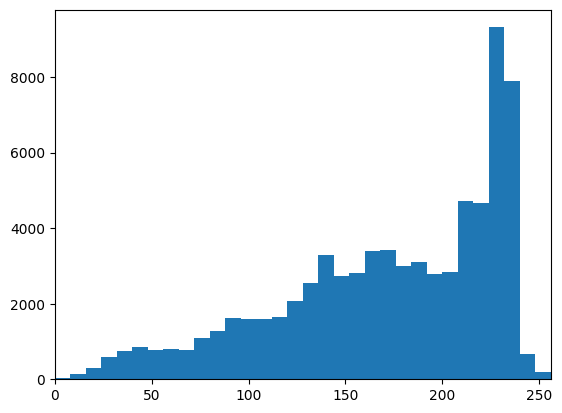

In [153]:
# ось X показывает все значения, которые есть на изображении, а ось Y показывает частоту этих значений.
fig, ax = plt.subplots(1, 1)
ax.hist(text.ravel(), bins=32, range=[0, 256])
ax.set_xlim(0, 256);

## ПОРОГОВЫЙ МЕТОД

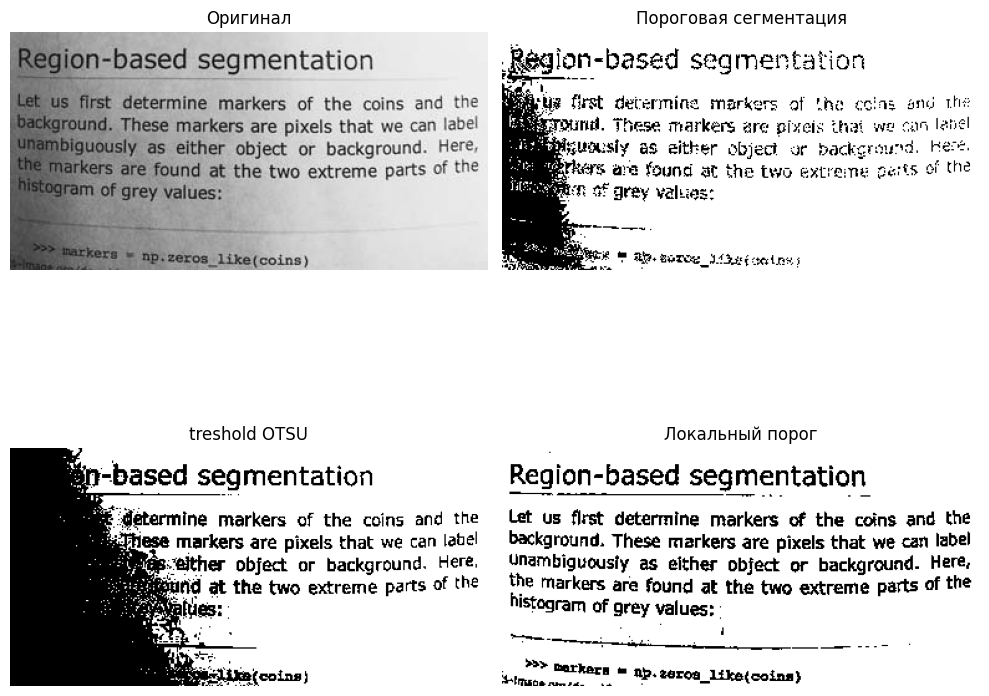

In [148]:
# Контролируемый ПОРОГ
text_segmented_1 = (text > 50) & (text < 70) | (text > 120)

# Не контролируемый ПОРОГ
text_treshold_2 = filters.threshold_otsu(text)  
# Применение порога к изображению
text_segmented_2 = text > text_treshold_2

text_treshold_3 = filters.threshold_li(text)  
# Применение порога к изображению
text_segmented_3 = text > text_treshold_3

text_threshold_4 = filters.threshold_local(text, block_size=51, offset=10)   
# Применение порога к изображению
text_segmented_4 = text > text_threshold_4

# Просмотр и сравнение результатов
show_four_images(text, text_segmented_1, text_segmented_2, text_segmented_4)

In [166]:
# Контролируемый ПОРОГ
# Преобразование типа данных массива к float64
image_float = image.astype(np.float64)
# Преобразование цветного изображения в чёрно-белое
gray_image = np.mean(image, axis=2).astype(np.uint8)
image_segmented_1 = (gray_image > 50) & (gray_image < 70) | (gray_image > 120)


# Не контролируемый ПОРОГ
image_threshold = filters.threshold_li(gray_image)  
# Применение порога к изображению
image_segmented_2 = gray_image > image_threshold


image_threshold = filters.threshold_local(gray_image, block_size=51, offset=10)   
# Применение порога к изображению
image_segmented_4 = gray_image > image_threshold


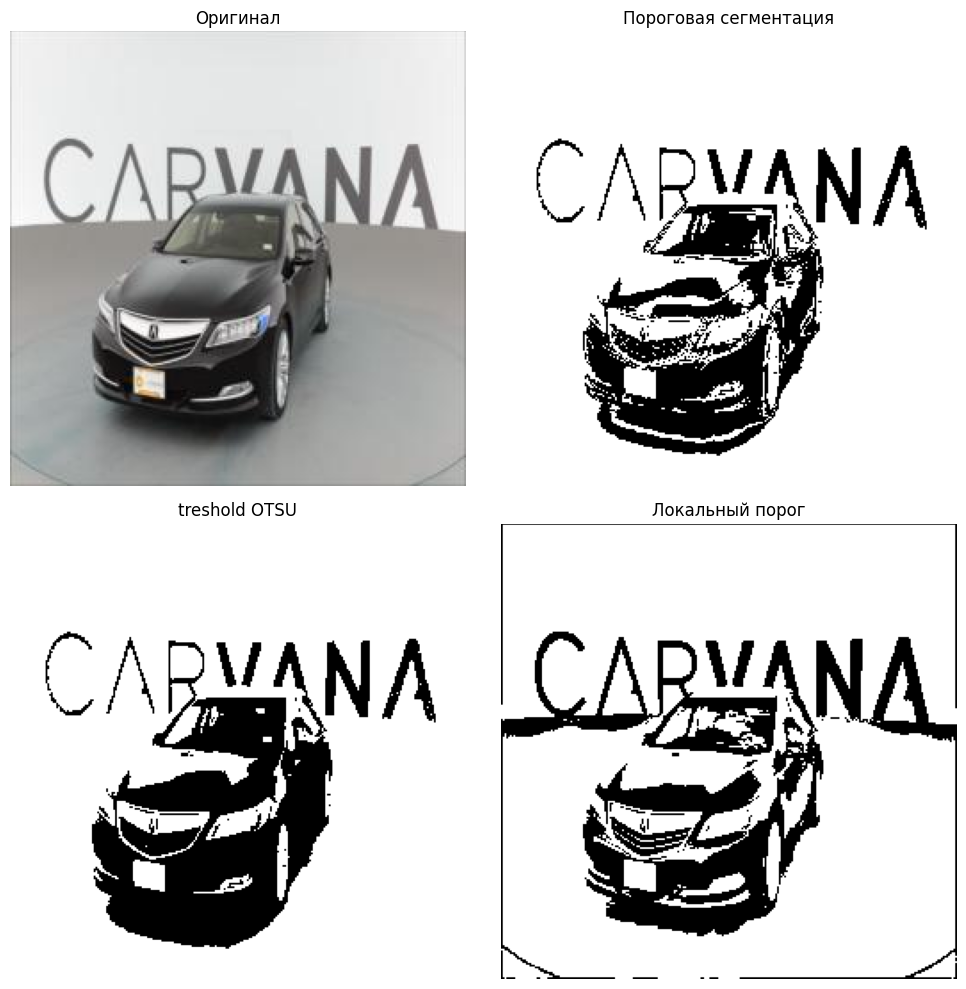

In [167]:
# Просмотр и сравнение результатов
show_four_images(image, image_segmented_1, image_segmented_2, image_segmented_4)

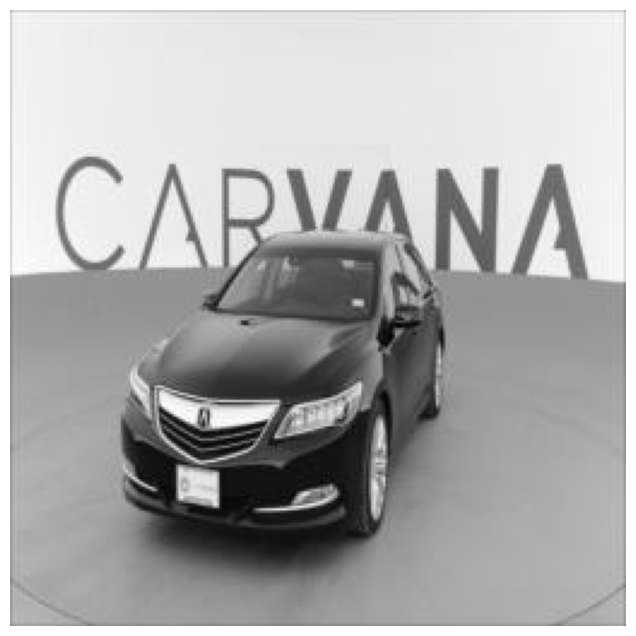

In [190]:
image_gray = color.rgb2gray(image) 
image_show(image_gray);


In [191]:
def circle_points(resolution, center, radius): 
    radians = np.linspace(0, 2*np.pi, resolution)
    c = center[1] + radius*np.cos(radians)#polar co-ordinates
    r = center[0] + radius*np.sin(radians)
    
    return np.array([c, r]).T
# Exclude last point because a closed path should not have duplicate points
points = circle_points(200, [155, 115], 80)[:-1]

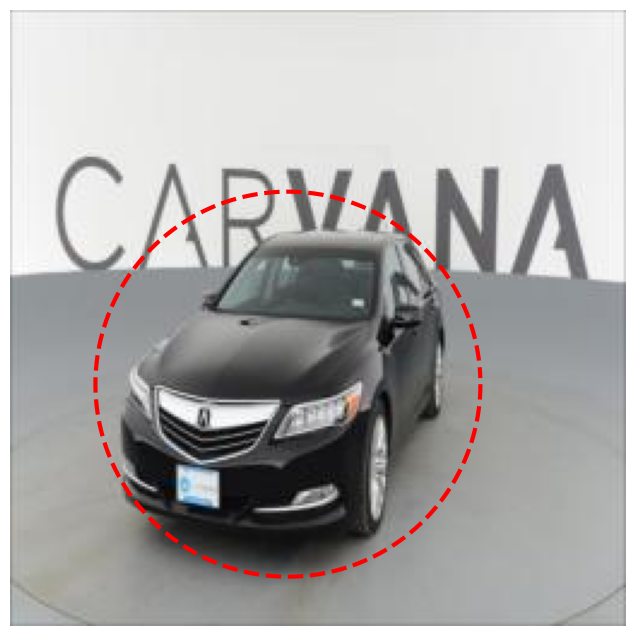

In [192]:
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)

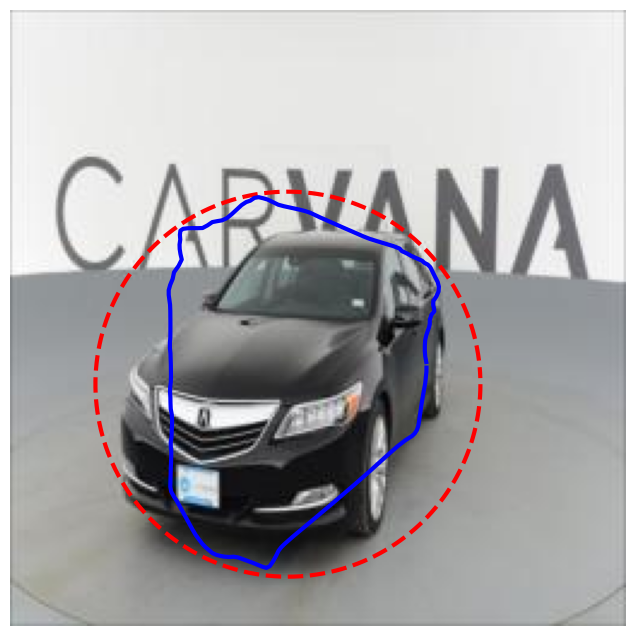

In [193]:
snake = seg.active_contour(image_gray, points,alpha=0.16,beta=0.13)
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

In [194]:
image_labels = np.zeros(image_gray.shape, dtype=np.uint8)

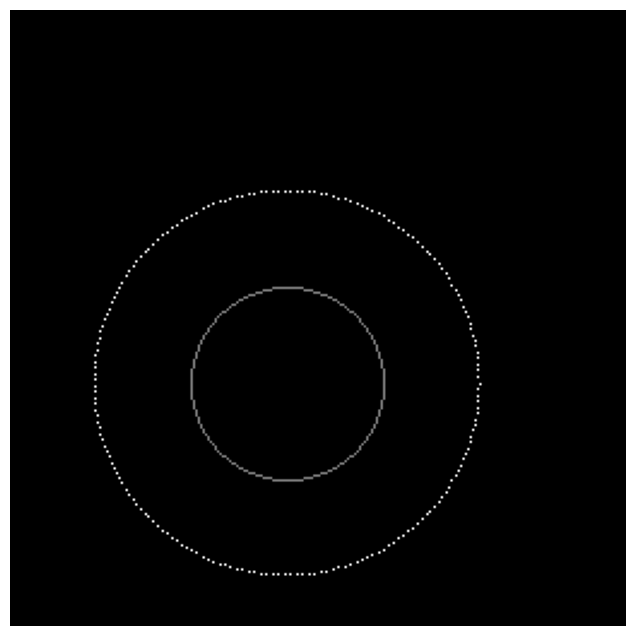

In [195]:
indices = draw.circle_perimeter(155, 115, 40)
image_labels[indices] = 1
image_labels[points[:, 1].astype(int), points[:, 0].astype(int)] = 2
image_show(image_labels);

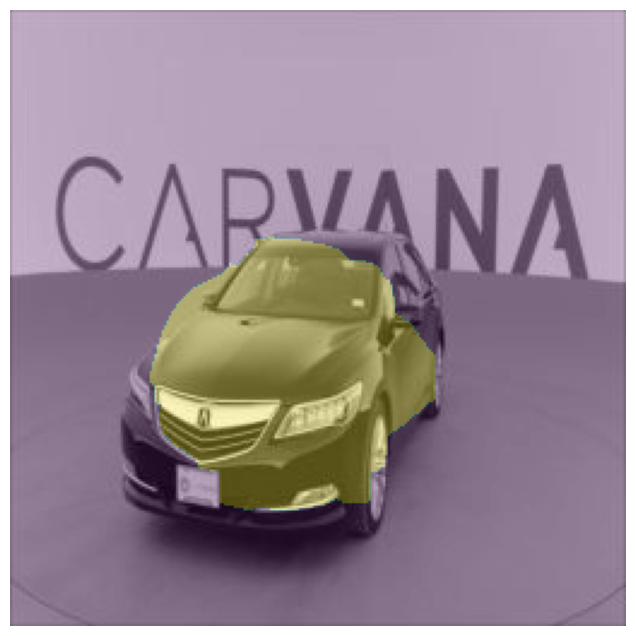

In [196]:
image_segmented = seg.random_walker(image_gray, image_labels)
# Check our results
fig, ax = image_show(image_gray)
ax.imshow(image_segmented == 1, alpha=0.3);